# <center> Homework 4

### Summary
In this report we will work with SQL and Regex to solve various tasks thru out the report. But we will also revisit something that we previously did and that is managing dataframes with missing values and then merging diffrent dataframes togther.

### Joining Data

In this task, we combine two datasets—cell phone data and population data—to analyze the number of cell phones per capita for each country over time and for clearification we will use another csv file to better understand in which country the calls were made in. 

Well start by cleaning and pivoting both datasets into the right format. Each dataset should have columns like iso-3, year, n_cellphones, and population, with each row representing a country in a given year.

After reshaping, combine the cell phone data and population data using a common key, such as the country code (iso-3) and year.

During the reshaping and merging process, there may be missing values. You need to handle these appropriately (e.g., filling or removing them).

Once the datasets are merged, calculate the number of cell phones per capita by dividing the number of cell phones (n_cellphones) by the population for each country and year.

The final result will be a table showing the number of cell phones per capita for each country, over the years.

In [ ]:
import pandas as pd

def convert_to_numeric(value):
    '''
    Convert all values in the DataFrame to numeric values instead
    '''
    if isinstance(value, str):
        value = value.replace('k', 'e3').replace('M', 'e6')  # Convert 'k' to 'e3', 'M' to 'e6'
    try:
        return pd.to_numeric(value, errors='coerce')  # invalid values become NaN values instead
    except:
        return None  # In case of invalid conversion which occurred, it returns None and will become a NaN value  

cell_phone_data = pd.read_csv('cell_phones_total.csv')
# Reshape the data into a long format
#Converting columns into rows for each year
cell_phone_data_long = cell_phone_data.melt(id_vars=["iso-3"], var_name="year", value_name="n_cellphones")

# Converting the 'n_cellphones' column into numeric values
cell_phone_data_long['n_cellphones'] = cell_phone_data_long['n_cellphones'].map(convert_to_numeric)

# Converting the 'year' column to numeric (it might be in string format after melting)
cell_phone_data_long['year'] = pd.to_numeric(cell_phone_data_long['year'], errors='coerce')

# Handling missing data with replacing them with 0
cell_phone_data_long['n_cellphones'].fillna(0, inplace=True)
print(cell_phone_data_long.head())


  iso-3  year  n_cellphones
0   ABW  1960           0.0
1   AFG  1960           0.0
2   AGO  1960           0.0
3   ALB  1960           0.0
4   AND  1960           0.0


C:\Users\tonyf\AppData\Local\Temp\ipykernel_18724\1915285176.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cell_phone_data_long['n_cellphones'].fillna(0, inplace=True)


We need to join the data by using teqniques such as pivoting. 

In [ ]:
pop_data = pd.read_csv('pop_data.csv')
# Reshaping the population data to long format
pop_data_long = pop_data.melt(id_vars=["iso-3"], var_name="year", value_name="population")

# Converting 'year' and 'population' columns to numeric
pop_data_long['year'] = pd.to_numeric(pop_data_long['year'], errors='coerce')
pop_data_long['population'] = pd.to_numeric(pop_data_long['population'], errors='coerce')

# Handling missing values in the population column (e.g., forward fill or fill with 0)
pop_data_long['population'].fillna(method='ffill', inplace=True)
print(pop_data_long.head())

  iso-3  year  population
0   ABW   NaN         0.0
1   AFE   NaN         1.0
2   AFG   NaN         2.0
3   AFW   NaN         3.0
4   AGO   NaN         4.0


C:\Users\tonyf\AppData\Local\Temp\ipykernel_18724\3874350138.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pop_data_long['population'].fillna(method='ffill', inplace=True)
C:\Users\tonyf\AppData\Local\Temp\ipykernel_18724\3874350138.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pop_data_long['population'].fillna(method='ffill', inplace=True)


In [ ]:
# Merging reshaped cell phone data and population data
merged_data = pd.merge(cell_phone_data_long, pop_data_long, on=['iso-3', 'year'], how='inner')

# Mimicing the table in the instructions
final_data = merged_data[['iso-3', 'year', 'n_cellphones', 'population']]

# Display the final merged dataset
print(final_data.head())
final_data.to_csv('final_data.csv', index=False)

  iso-3  year  n_cellphones  population
0   ABW  1960           0.0     54608.0
1   AFG  1960           0.0   8622466.0
2   AGO  1960           0.0   5357195.0
3   ALB  1960           0.0   1608800.0
4   AND  1960           0.0      9443.0


The table above is the desired shape we'd like to work with.

In [ ]:
country_data = pd.read_csv('country_data.csv')

# Extracting relevant columns: 'alpha-3' and 'name'
country_data_filtered = country_data[['alpha-3', 'name']].rename(columns={'alpha-3': 'iso-3', 'name': 'country'})

merged_data = pd.merge(cell_phone_data_long, pop_data_long, on=['iso-3', 'year'], how='inner')

# Country names by merging with the country data
merged_data = pd.merge(merged_data, country_data_filtered, on='iso-3', how='left')

merged_data['phones_per_capita'] = merged_data['n_cellphones'] / merged_data['population']

data_2019 = merged_data[merged_data['year'] == 2019]

# Sorting by phones_per_capita in descending order
top_countries_2019 = data_2019.sort_values('phones_per_capita', ascending=False).head()

# Selecting only country names and phones_per_capita for 2019
top_countries_2019 = top_countries_2019[['country', 'phones_per_capita']].set_index('country').T

filtered_years = merged_data[(merged_data['year'] >= 2015) & (merged_data['year'] <= 2019)]

# Pivoting the data to have years as rows and countries as columns
pivot_data = filtered_years.pivot(index='year', columns='country', values='phones_per_capita')

# Picking the top 5 countries for 2019
top_5_countries = top_countries_2019.columns[:5]
final_table = pivot_data[top_5_countries]
print(final_table)

# Saveing the final table to a CSV file
final_table.to_csv('phones_per_capita_2015_2019.csv', index=True)

country  Hong Kong  United Arab Emirates  Seychelles  Montenegro  Thailand
year                                                                      
2015      2.290401              2.007424    1.584260    1.623379  1.465266
2016      2.398931              2.212521    1.605459    1.671212  1.699547
2017      2.488773              2.183431    1.742433    1.671024  1.720777
2018      2.670209              2.199084    1.849900    1.816057  1.757400
2019      2.863650              2.127739    1.987196    1.848791  1.823083


We've used different teqniques to obatin this shape of csv file 

C:\Users\tonyf\AppData\Local\Temp\ipykernel_18724\2272498938.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_5_years['phones_per_capita'] = data_last_5_years['n_cellphones'] / data_last_5_years['population']


<Figure size 1200x800 with 0 Axes>

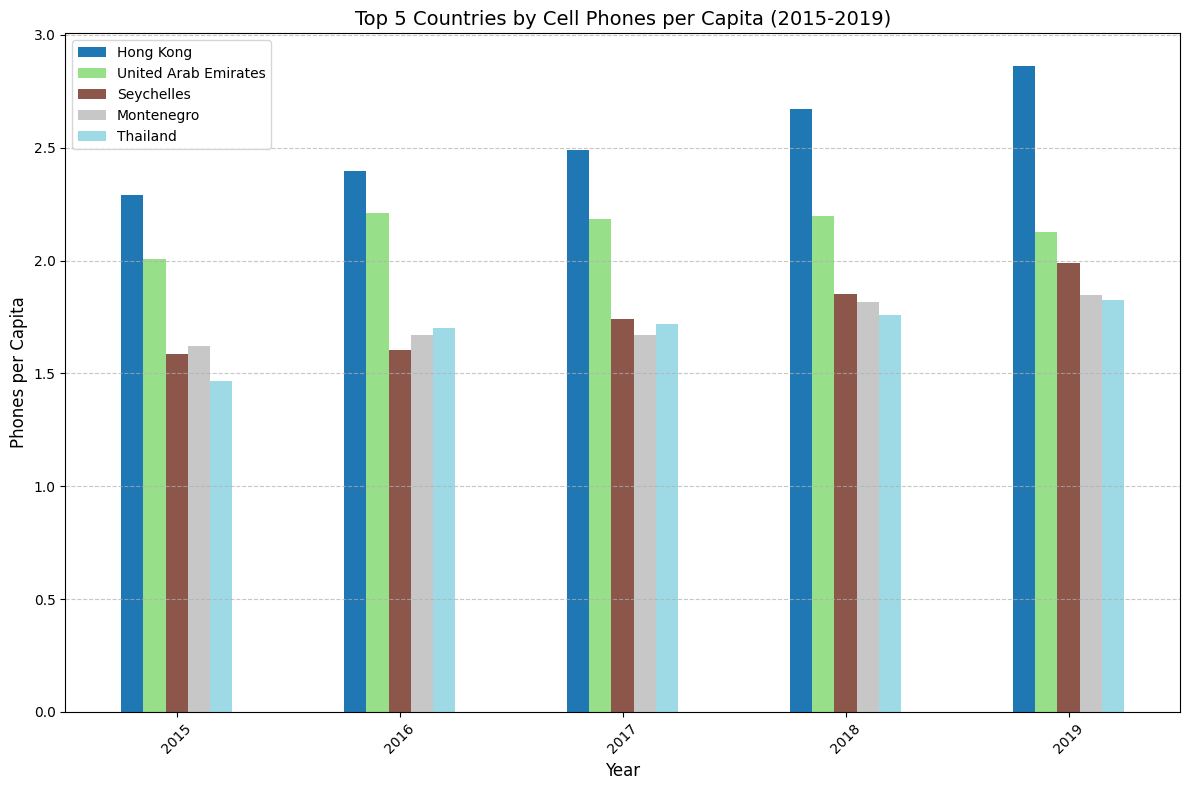

In [ ]:
import matplotlib.pyplot as plt

country_mapping = pd.read_csv('country_data.csv')
# Creating a dictionary for iso-3 to country names
iso_to_country = dict(zip(country_mapping['alpha-3'], country_mapping['name']))

# Filtering the data for the last 5 years (2015-2019)
data_last_5_years = merged_data[merged_data['year'] >= 2015]

# Calculating phones per capita
data_last_5_years['phones_per_capita'] = data_last_5_years['n_cellphones'] / data_last_5_years['population']

# Pivoting the data so that each country is a column and years are rows
pivot_data = data_last_5_years.pivot(index='year', columns='iso-3', values='phones_per_capita')

# Top 5 countries with highest phones per capita in 2019 (or any other year)
top_countries = pivot_data.loc[2019].sort_values(ascending=False).head(5).index

# Filter the data to include only the top countries
top_countries_data = pivot_data[top_countries]

# Map ISO-3 codes to country names
top_countries_data.columns = [iso_to_country[iso] for iso in top_countries_data.columns]

# Ploting the phones per capita for the top countries over the last 5 years
plt.figure(figsize=(12, 8))
top_countries_data.plot(kind='bar', figsize=(12, 8), colormap='tab20')

plt.title('Top 5 Countries by Cell Phones per Capita (2015-2019)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Phones per Capita', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This is in line of what the table showed us earlier

### SQL
We will perform several analyses on the user_actions table from an SQLite database file (user_actions.db).

We'll retrieve Usernames of Users Who Signed Up by using an SQL query to fetch the usernames of all users who have performed the "signup" action.
Then we will perform another query to fetch the Total Number of Log Entries per User and again use SQL to calculate the total number of log entries for each user, showing the user_id, username, and the count of log entries.

Identifying Users Who Signed Up and Logged In on the Same Day is obtained writing an SQL query to identify users who performed both the "signup" and "login" actions on the same day, and display their user_id and username.


In [19]:
import sqlite3
# Path to the SQLite database
db_path = 'user_actions.db'

# Connect to the database
conn = sqlite3.connect(db_path)

# Create a cursor object
cursor = conn.cursor()

# SQL query to retrieve usernames for the "signup" action
query = "SELECT username FROM user_actions WHERE action = 'signup'"

# Execute the query
cursor.execute(query)

# Fetch all matching rows
signup_users = cursor.fetchall()

# Close the connection
conn.close()

# Extract usernames from the results
signup_usernames = [row[0] for row in signup_users]

# Display the usernames
print("Usernames of users who performed 'signup' action:")
print(signup_usernames)

Usernames of users who performed 'signup' action:
['user34', 'user28', 'user1', 'user24', 'user15', 'user20', 'user18', 'user25', 'user3', 'user9', 'user27', 'user16', 'user17', 'user4', 'user8', 'user13', 'user19', 'user31', 'user10', 'user23', 'user11', 'user33', 'user12', 'user29', 'user21', 'user6', 'user14', 'user30', 'user7', 'user26', 'user22', 'user5', 'user35', 'user2', 'user32']


In [ ]:
db_path = 'user_actions.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

query = """
SELECT user_id, username, COUNT(*) AS log_count
FROM user_actions
GROUP BY user_id, username
ORDER BY log_count DESC;
"""

# Executeing the query
cursor.execute(query)

# Fetching all results
user_log_counts = cursor.fetchall()

# Close the connections
conn.close()
# Displaying the results
print("User Log Counts:")
print(f"{'User ID':<10} {'Username':<20} {'Log Count':<10}")
for user_id, username, log_count in user_log_counts:
    print(f"{user_id:<10} {username:<20} {log_count:<10}")

User Log Counts:
User ID    Username             Log Count 
13         user13               470       
6          user6                457       
4          user4                436       
35         user35               394       
31         user31               389       
16         user16               379       
17         user17               367       
7          user7                362       
20         user20               362       
8          user8                329       
11         user11               328       
21         user21               323       
14         user14               320       
23         user23               309       
22         user22               275       
26         user26               217       
27         user27               211       
12         user12               209       
5          user5                192       
34         user34               180       
10         user10               170       
30         user30               165  

In [ ]:
db_path = 'user_actions.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# SQL query to find users who have both logged in and signed up on the same day
query = """
SELECT DISTINCT a.user_id, a.username
FROM user_actions a
JOIN user_actions b
ON a.user_id = b.user_id AND DATE(a.timestamp) = DATE(b.timestamp)
WHERE a.action = 'signup' AND b.action = 'login';
"""
cursor.execute(query)
users_same_day = cursor.fetchall()
conn.close()

print("Users who logged in and signed up on the same day:")
print(f"{'User ID':<10} {'Username':<20}")
for user_id, username in users_same_day:
    print(f"{user_id:<10} {username:<20}")

Users who logged in and signed up on the same day:
User ID    Username            
8          user8               
12         user12              
30         user30              
7          user7               
22         user22              
5          user5               
2          user2               
32         user32              


### Regex to extract information
In this part of the report we'll be using regex to extract information from a text file. The file consists of comments from users and some of them use hashtags and with various commands we'll be able to extract the hashtags that has a word attached to them.

In [ ]:
import re

file_path = 'comments.txt'

# Reading the file
with open(file_path, 'r') as file:
    comments = file.readline().strip()

hashtags = re.findall(r'#\w+', comments)

print("First Comment:", comments)
print("Extracted hashtags from the first comment:", hashtags)

First Comment: 1. "Great post! #programming #tips"
Extracted hashtags from the first comment: ['#programming', '#tips']


In [ ]:
comment_2 = comments[1]
regex = r"(?=.*#programming)(?=.*#python)"

if re.search(regex, comment_2):
    print("The second row of comment mentions both #programming and #python:")
    print(comment_2)
else:
    print("The second row of comment does not mention both #programming and #python.")

The second row of comment does not mention both #programming and #python.


In [ ]:
# Initializing a set to store unique hashtags
unique_hashtags = set()

with open(file_path, 'r') as file:
    for comment in file:
        # Extracting hashtags from the comment
        hashtags = re.findall(r'#\w+', comment)
        unique_hashtags.update(hashtags)

print("Unique hashtags found in the comments file:")
print(unique_hashtags)

Unique hashtags found in the comments file:
{'#python', '#tech', '#coding', '#research', '#insights', '#analytics', '#analysis', '#innovation', '#programming', '#tips', '#data'}
